# DSE Course 2, Lab 3: Practice with Supervised Learners

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

In this lab we will continue to practice creation of pipelines, feature engineering, and applying learning algorithms.

Now that we have ALL the supervised learning methods, and we've covered Grid Search, we will use these tools to do a sophisticated, search of hyperparameter optimization.

<br>

---




In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random
import scipy.stats
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns; sns.set()
import graphviz 
from sklearn.metrics import accuracy_score
from ipywidgets import interact, interactive, widgets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# Code Cell for Exercise 4.2.4
wine = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

wine.dropna(inplace=True) # I could impute

wine['quality_label'] = wine['quality'].apply(lambda x: 'low' if x <=5 else
                                              'med' if x <= 7 else 'high')

wine['type_encoding'] = wine['type'].map({'red': 0, 'white': 1})
wine['quality_encoding'] = wine['quality_label'].map({'low':0, 
                                                      'med': 1, 'high': 2})

wine.columns = wine.columns.str.replace(' ', '_')

features = list(wine.columns[1:-1].values)
features.remove('quality_label')
features.remove('quality')

X = wine[features]
y = wine['quality']

# FOR ADDITIONAL SOLUTIONS/CONSIDERATIONS TO THIS LAB PLEASE SEE C2 S6 PRODUCT QUALITY CASE STUDY

# L3 Q1: 

Create train and test datasets for wine quality

Create new train/test datasets that are normalized (but have the same indices as the original train/test sets for comparison)

In [ ]:
# Code Cell for L1 Q1
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
scaler = StandardScaler()

# note we fit/transform on train
X_train_std = scaler.fit_transform(X_train)

# and only transform on test
X_test_std = scaler.transform(X_test)

# we do not scale the y data (classification task)

# L3 Q2:

Evaluate the performance of Random Forest, AdaBoost, and SVM on classifying wine quality


In [ ]:
# Code Cell for L1 Q2
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)

print("train: {:.2f}, test: {:.2f}".format(acc_train, acc_test))

train: 1.00, test: 0.69


In [ ]:
# Code Cell for L1 Q2
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)

print("train: {:.2f}, test: {:.2f}".format(acc_train, acc_test))

train: 0.35, test: 0.32


In [ ]:
# Code Cell for L1 Q2
model = SVC()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)

print("train: {:.2f}, test: {:.2f}".format(acc_train, acc_test))

train: 0.44, test: 0.43


# L3 Q3:

Perform a grid search on the best performant model, use whatever hyperparameters you would like



In [ ]:
# Code Cell for L1 Q3
params = {'n_estimators': [50, 100, 200, 500, 800],
          'max_depth': [1, 10],
          'min_samples_leaf': [1, 3],
          'min_samples_split': [2, 3]}
grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

max_depth of 1 really lowers our performance!

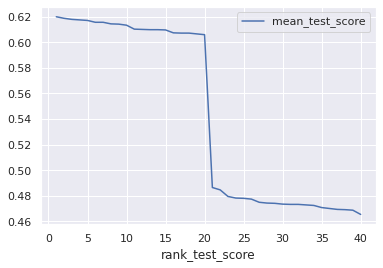

In [ ]:
results.plot('rank_test_score', 'mean_test_score')

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)